In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.set({"figure.figsize":(17,8)})
sns.set(font_scale = 1.15)

In [2]:
# Nos traemos el data set 
v = pd.read_csv("../../Raw Data/voley.csv",encoding = "ISO-8859-1")

In [3]:
v.head(3)

,index,name,date_of_birth,height,weight,spike,block,position_number,country
0,0,Angelina Lazarenko,13/04/1998,193,80,320,305,3,23
1,1,Svetlana Serbina,15/05/1996,182,71,295,284,1,23
2,2,Ekaterina Shkurikhina,17/06/1996,190,72,306,296,2,23


In [4]:
v['dob'] = v['date_of_birth']

In [5]:
#Seleccionamos las columnas que nos interesan
selected_columns = v[["name","dob",]]
df = selected_columns.copy()
df.head(3)

,name,dob
0,Angelina Lazarenko,13/04/1998
1,Svetlana Serbina,15/05/1996
2,Ekaterina Shkurikhina,17/06/1996


In [6]:
df = df[df['dob'].notna()]

In [7]:
df['year'] = pd.DatetimeIndex(df['dob']).year
df['month'] = pd.DatetimeIndex(df['dob']).month
df['day'] = pd.DatetimeIndex(df['dob']).day
df.head(3)

,name,dob,year,month,day
0,Angelina Lazarenko,13/04/1998,1998,4,13
1,Svetlana Serbina,15/05/1996,1996,5,15
2,Ekaterina Shkurikhina,17/06/1996,1996,6,17


In [8]:
def trimestres(row):
    if row['month'] < 4 :
        return 1
    elif row['month'] < 7:
        return 2
    elif row['month'] < 10:
        return 3
    else:
        return 4  

In [9]:
df['trimestre'] = df.apply (lambda month: trimestres(month), axis=1)

In [10]:
df.head(3)

,name,dob,year,month,day,trimestre
0,Angelina Lazarenko,13/04/1998,1998,4,13,2
1,Svetlana Serbina,15/05/1996,1996,5,15,2
2,Ekaterina Shkurikhina,17/06/1996,1996,6,17,2


In [11]:
df['Deporte'] = 'Voley'

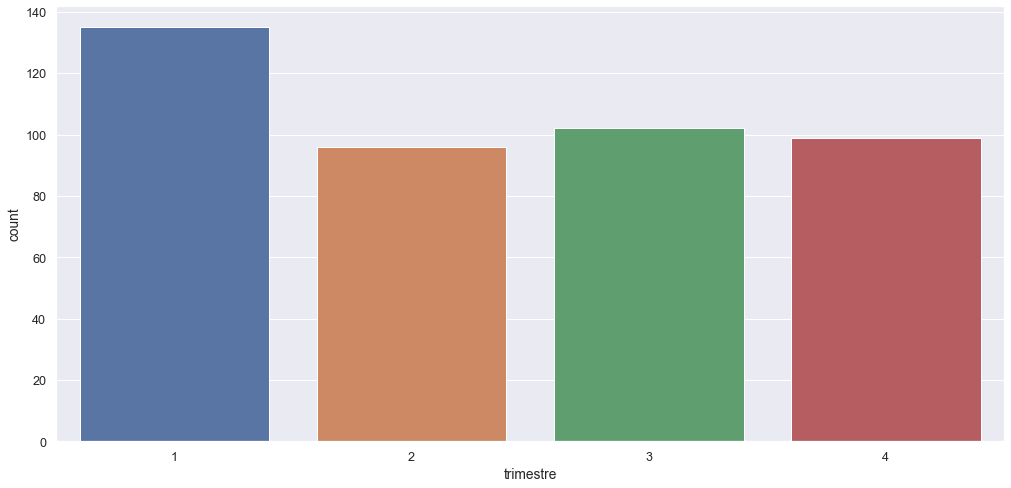

In [12]:
ax = sns.countplot(x="trimestre", data=df)

In [13]:
df.to_csv('../../Data/voley.csv', encoding='utf-8')

In [15]:
df.head(3)

,name,dob,year,month,day,trimestre,Deporte
0,Angelina Lazarenko,13/04/1998,1998,4,13,2,Voley
1,Svetlana Serbina,15/05/1996,1996,5,15,2,Voley
2,Ekaterina Shkurikhina,17/06/1996,1996,6,17,2,Voley
